In [1]:
import sys
import tensorflow as tf
import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d
from glob import glob
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [6]:
sys.path.append("..")
from sln_trail_task.interpolation import BilinearInterpolation
from sln_trail_task.convolutional_localization import CoordConvLocalizationLayer, ConvolutionalLocalizationLayer
from sln_trail_task.coords import AddCoordFeatures2D
from sln_trail_task.data import get_aff_mnist_data
from sln_trail_task.spatial_transform import SimpleSpatialTransformBlock
from sln_trail_task.visualization import show_train_progress

In [4]:
train_img_data, train_img_label, test_img_data, test_img_label = get_aff_mnist_data()

In [14]:
input_shape = (40, 40, 1)
image = tf.keras.layers.Input(shape=input_shape)

x = image
x = tf.keras.layers.Conv2D(32, [7, 7], activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(32, [5, 5], activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(60, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation=None)(x)

model = tf.keras.models.Model(inputs=image, outputs=x)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 40, 40, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 32)        1600      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 60)                6918

In [16]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [17]:
history = model.fit(
    x = train_img_data, 
    y = train_img_label, 
    batch_size = 128,
    epochs = 3,
    validation_data = (test_img_data,  test_img_label),
    validation_batch_size = 1024,
)

Epoch 1/3
12500/12500 [==============================] - 84s 7ms/step - loss: 1.0270 - accuracy: 0.6910 - val_loss: 0.1336 - val_accuracy: 0.9582
Epoch 2/3
12500/12500 [==============================] - 81s 6ms/step - loss: 0.1212 - accuracy: 0.9627 - val_loss: 0.0843 - val_accuracy: 0.9741
Epoch 3/3
12500/12500 [==============================] - 83s 7ms/step - loss: 0.0824 - accuracy: 0.9743 - val_loss: 0.0714 - val_accuracy: 0.9778


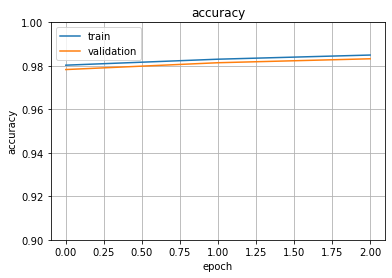

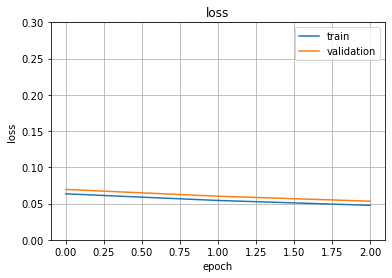

In [21]:
show_train_progress(history)